
# Machine-Learning-Based Network security management system
---


- This code showcases how IDS can be designed and intergrated in computer systems.
- THe code is based on CICIDS2017 dataset and it serves a purpose as a final Year project.

## Get all necessary libraries


In [1]:
import os
import re
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support, f1_score, 
    recall_score, precision_recall_curve, precision_score, roc_curve,auc
)

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from  xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.decomposition import PCA

#for features selection
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import f_classif

# for getting feature importances
from xgboost import plot_importance


import warnings
warnings.filterwarnings("ignore")

In [2]:
# some settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

---
## The CICIDS2017 dataset
- The CICIDS2017 dataset can be found in kaggle through  https://www.kaggle.com/datasets/cicdataset/cicids2017 or pulicly at: https://www.unb.ca/cic/datasets/ids-2017.html  



`COPIED FROM DESCRIPTION`.

````


About Dataset
Intrusion Detection Systems (IDSs) and Intrusion Prevention Systems (IPSs) are the most important defense tools against the sophisticated and ever-growing network attacks. Due to the lack of reliable test and validation datasets, anomaly-based intrusion detection approaches are suffering from consistent and accurate performance evolutions.

Our evaluations of the existing eleven datasets since 1998 show that most are out of date and unreliable. Some of these datasets suffer from the lack of traffic diversity and volumes, some do not cover the variety of known attacks, while others anonymize packet payload data, which cannot reflect the current trends. Some are also lacking feature set and metadata.

CICIDS2017 dataset contains benign and the most up-to-date common attacks, which resembles the true real-world data (PCAPs). It also includes the results of the network traffic analysis using CICFlowMeter with labeled flows based on the time stamp, source, and destination IPs, source and destination ports, protocols and attack (CSV files). Also available is the extracted features definition.

Generating realistic background traffic was our top priority in building this dataset. We have used our proposed B-Profile system (Sharafaldin, et al. 2016) to profile the abstract behavior of human interactions and generates naturalistic benign background traffic. For this dataset, we built the abstract behavior of 25 users based on the HTTP, HTTPS, FTP, SSH, and email protocols.

The data capturing period started at 9 a.m., Monday, July 3, 2017, and ended at 5 p.m. on Friday, July 7, 2017, for a total of 5 days. Monday is the normal day and only includes benign traffic. The implemented attacks include Brute Force FTP, Brute Force SSH, DoS, Heartbleed, Web Attack, Infiltration, Botnet and DDoS. They have been executed both morning and afternoon on Tuesday, Wednesday, Thursday and Friday.

In our recent dataset evaluation framework (Gharib et al., 2016), we have identified eleven criteria that are necessary for building a reliable benchmark dataset. None of the previous IDS datasets could cover all of the 11 criteria. In the following, we briefly outline these criteria:

Complete Network configuration: A complete network topology includes Modem, Firewall, Switches, Routers, and presence of a variety of operating systems such as Windows, Ubuntu, and Mac OS X.

Complete Traffic: By having a user profiling agent and 12 different machines in Victim-Network and real attacks from the Attack-Network.

Labelled Dataset: Section 4 and Table 2 show the benign and attack labels for each day. Also, the details of the attack timing will be published on the dataset document.

Complete Interaction: As Figure 1 shows, we covered both within and between internal LAN by having two different networks and Internet communication as well.

Complete Capture: Because we used the mirror port, such as a tapping system, all traffics have been captured and recorded on the storage server.

Available Protocols: Provided the presence of all commonly available protocols, such as HTTP, HTTPS, FTP, SSH an and email protocols.

Attack Diversity: Included the most common attacks based on the 2016 McAfee report, such as Web-based, Brute force, DoS, DDoS, Infiltration, Heart-bleed, Bot, and Scan covered in this dataset.

Heterogeneity: Captured the network traffic from the main Switch and memory dump and system calls from all victim machines, during the execution of the attack.

Feature Set: Extracted more than 80 network flow features from the generated network traffic using CICFlowMeter and delivered the network flow dataset as a CSV file. See our PCAP analyzer and CSV generator.

MetaData: Completely explained the dataset which includes the time, attacks, flows and labels in the published paper.

The full research paper outlining the details of the dataset and its underlying principles:

Iman Sharafaldin, Arash Habibi Lashkari, and Ali A. Ghorbani, “Toward Generating a New Intrusion Detection Dataset and Intrusion Traffic Characterization”, 4th International Conference on Information Systems Security and Privacy (ICISSP), Purtogal, January 2018


````


- The model for this project will be generic and can be usefull in ant IDS dataset or Network Traffic ones.


---

### Loading Dataset and Precheck.

In [3]:
# check the file we have
os.listdir("/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE")

['Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
 'Tuesday-WorkingHours.pcap_ISCX.csv',
 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
 'Monday-WorkingHours.pcap_ISCX.csv',
 'Friday-WorkingHours-Morning.pcap_ISCX.csv',
 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
 'Wednesday-workingHours.pcap_ISCX.csv']

In [4]:
# check number of files present
len(os.listdir("/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE"))

8

In [5]:
# read all the data
df1=pd.read_csv("/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")#,nrows = 50000
df2=pd.read_csv("/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv("/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv("/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")

In [6]:
# check the number of columns present in each dataset
df1.shape, df2.shape, df3.shape,df4.shape, df5.shape, df6.shape, df7.shape, df8.shape

((225745, 79),
 (286467, 79),
 (191033, 79),
 (529918, 79),
 (288602, 79),
 (170366, 79),
 (445909, 79),
 (692703, 79))

In [7]:
# check the labels present in each data

print (df1[' Label'].unique())
print (df2[' Label'].unique())
print (df3[' Label'].unique())
print (df4[' Label'].unique())
print (df5[' Label'].unique())
print (df6[' Label'].unique())
print (df7[' Label'].unique())
print (df8[' Label'].unique())


['BENIGN' 'DDoS']
['BENIGN' 'PortScan']
['BENIGN' 'Bot']
['BENIGN']
['BENIGN' 'Infiltration']
['BENIGN' 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection']
['BENIGN' 'FTP-Patator' 'SSH-Patator']
['BENIGN' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye'
 'Heartbleed']


In [8]:
# combine all of these dataset to form a single data that we will use.


df = pd.concat([df1,df2])
df = pd.concat([df,df3])
df = pd.concat([df,df5])
df = pd.concat([df,df6])

df = pd.concat([df,df4])
df = pd.concat([df,df7])
df = pd.concat([df,df8])


In [9]:
# delete these original data
del df1,df2, df3,df4,df5, df6, df7, df8

In [10]:
#get the information aboubt the new dataset creaated

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830743 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max          

In [11]:
### just rename Labels that contain non-printable characters 
print("Before...")
print(df.loc[:," Label"].unique())


# all xss, sql inject are and brute force are going to be renamed web attack
df.loc[:," Label"].replace({"Web Attack � XSS" : "Web Attack", "Web Attack � Sql Injection": "Web Attack", "Web Attack � Brute Force": "Web Attack"}, inplace=True)
print("After..")
print(df.loc[:," Label"].unique())

## remove trailing && leading spaces from all the labels
rename_cols = lambda col_lbl: col_lbl.strip()
df.rename(rename_cols, axis=1, inplace=True, errors="raise")

Before...
['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration'
 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris'
 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed']
After..
['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration' 'Web Attack'
 'FTP-Patator' 'SSH-Patator' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk'
 'DoS GoldenEye' 'Heartbleed']


In [12]:
# drop nulls
df = df.dropna()

In [13]:
# delete columns with only zeros

## feature selection phase - find cols w/ all zero values
describe_info = df.describe()
all_zeroes_cols = describe_info.loc[:,(describe_info.iloc[1:] == 0).all()]
all_zeroes_cols

,Bwd PSH Flags,Bwd URG Flags,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate
count,2829385.0,2829385.0,2829385.0,2829385.0,2829385.0,2829385.0,2829385.0,2829385.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
### feature selection phase - lets's cut out features that are reduntant - all zero values 
## removing [8] features from previous cell - they are reduntant 

df.drop(columns=all_zeroes_cols, inplace=True)


# recheck the shape
df.shape

(2829385, 71)

In [15]:
# remove nulls, inf etc

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep]


In [16]:
# keep a copy of the data before applying the above function
df_copy = df.copy()

In [17]:
# apply the function to clean

df = clean_dataset(df)

In [18]:
# recheck the shape
df.shape

(2827876, 71)

In [19]:
# check out some sample
df.sample(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
358721,53,170,2,2,94,256,47,47,47.0,0.0,128,128,128.0,0.0,2.058824e+06,2.352941e+04,56.666667,60.467622,121,1,48,48.0,0.0,48,48,1,1.0,0.0,1,1,0,0,64,64,1.176471e+04,11764.705882,47,128,79.4,44.365527,1968.3,0,0,0,0,0,0,0,0,1,99.25,47.0,128.0,64,2,94,2,256,-1,-1,1,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
215208,44176,74,1,1,0,6,0,0,0.0,0.0,6,6,6.0,0.0,8.108108e+04,2.702703e+04,74.000000,0.000000,74,74,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,40,20,1.351351e+04,13513.513510,0,6,2.0,3.464102,12.0,0,0,0,1,0,0,0,0,1,3.00,0.0,6.0,40,1,0,1,6,29200,0,0,40,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
682622,443,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.000000,0.000000,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.0,0.000000,0.0,1,0,0,0,0,0,0,0,0,9.00,6.0,0.0,40,2,12,0,0,0,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
184752,2006,35,1,1,0,6,0,0,0.0,0.0,6,6,6.0,0.0,1.714286e+05,5.714286e+04,35.000000,0.000000,35,35,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,40,20,2.857143e+04,28571.428570,0,6,2.0,3.464102,12.0,0,0,0,1,0,0,0,0,1,3.00,0.0,6.0,40,1,0,1,6,29200,0,0,40,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
114202,53,31573,2,2,68,150,34,34,34.0,0.0,75,75,75.0,0.0,6.904634e+03,1.266905e+02,10524.333330,18224.349980,31568,1,1,1.0,0.0,1,1,4,4.0,0.0,4,4,0,0,64,40,6.334526e+01,63.345263,34,75,50.4,22.456625,504.3,0,0,0,0,0,0,0,0,1,63.00,34.0,75.0,64,2,68,2,150,-1,-1,1,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [20]:
# col with nulls
list(df.columns[df.isna().sum() >1])

[]

In [21]:
df['Label'].value_counts()

BENIGN              2271320
DoS Hulk             230124
PortScan             158804
DDoS                 128025
DoS GoldenEye         10293
FTP-Patator            7935
SSH-Patator            5897
DoS slowloris          5796
DoS Slowhttptest       5499
Web Attack             2180
Bot                    1956
Infiltration             36
Heartbleed               11
Name: Label, dtype: int64

In [22]:
# check percentage distribution
df['Label'].value_counts(normalize=True)

BENIGN              0.803189
DoS Hulk            0.081377
PortScan            0.056157
DDoS                0.045272
DoS GoldenEye       0.003640
FTP-Patator         0.002806
SSH-Patator         0.002085
DoS slowloris       0.002050
DoS Slowhttptest    0.001945
Web Attack          0.000771
Bot                 0.000692
Infiltration        0.000013
Heartbleed          0.000004
Name: Label, dtype: float64

In [23]:
2271320*0.02

45426.4

### Data Selection.
- We will use approximately 250k records for modell training in order to assist in faster processing and modelling.
- Also this will help reduce imbalance that is present between differet classes.

- In this case, we will select only a few classes for modelling which will include the following.
    - Benign (normal packets).
    - PortScan
    - DOS.
    - FTP-Patator and SSH-Patator  which will be merged to SSH_FTP_Patator
    - Web Attack.
    - Bot
   

In [24]:
# rename FTP and SSH patator as a single label
df.loc[:,"Label"].replace({"FTP-Patator" : "SSH_FTP_Patator", "SSH-Patator": "SSH_FTP_Patator"}, inplace=True)

In [25]:
df.Label.value_counts()

BENIGN              2271320
DoS Hulk             230124
PortScan             158804
DDoS                 128025
SSH_FTP_Patator       13832
DoS GoldenEye         10293
DoS slowloris          5796
DoS Slowhttptest       5499
Web Attack             2180
Bot                    1956
Infiltration             36
Heartbleed               11
Name: Label, dtype: int64

In [26]:
# Randomly sample instances from majority classes

# get the bot, and web attack records
df_minor = df[(df['Label']=='WebAttack')|(df['Label']=='Bot')]
# get a sample of the normal or record without attacks.
df_BENIGN = df[(df['Label']=='BENIGN')].sample(n=None, frac=0.0135, replace=False, weights=None, random_state=None, axis=0)
df_DoS = df[(df['Label']=='DDoS')].sample(n=None, frac=0.15, replace=False, weights=None, random_state=None, axis=0)
df_PortScan = df[(df['Label']=='PortScan')].sample(n=None, frac=0.15, replace=False, weights=None, random_state=None, axis=0)
# get ssh patator dataset records
df_SSH_FTP_Patator = df[(df['Label']=='SSH_FTP_Patator')]

In [27]:
df_SSH_FTP_Patator.shape, df_PortScan.shape, df_DoS.shape, df_BENIGN.shape, df_minor.shape

((13832, 71), (23821, 71), (19204, 71), (30663, 71), (1956, 71))

In [28]:
# append all dataset

df_s = df_BENIGN.append(df_DoS).append(df_PortScan).append(df_SSH_FTP_Patator).append(df_minor)

In [29]:
# get the new dataset sample
df_s.sample(4)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
131046,80,9890421,6,0,36,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,3.639886,0.606648,1978084.200,4.421650e+06,9887773,4,9890421,1.978084e+06,4.421650e+06,9887773,4,0,0.00000,0.00000,0,0,0,0,120,0,0.606648,0.000000,6,6,6.0,0.000000,0.0000,0,0,0,0,1,0,0,0,0,7.000000,6.000000,0.000000,120,6,36,0,0,256,-1,5,20,2648.0,0.0,2648,2648,9887773.0,0.0,9887773,9887773,DDoS
167023,80,7292805,4,0,24,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,3.290915,0.548486,2430935.000,4.209627e+06,7291794,15,7292805,2.430935e+06,4.209627e+06,7291794,15,0,0.00000,0.00000,0,0,0,0,80,0,0.548486,0.000000,6,6,6.0,0.000000,0.0000,0,0,0,0,1,0,0,0,0,7.500000,6.000000,0.000000,80,4,24,0,0,256,-1,3,20,1011.0,0.0,1011,1011,7291794.0,0.0,7291794,7291794,DDoS
221039,7920,99,1,1,0,6,0,0,0.000000,0.000000,6,6,6.000000,0.000000,60606.060610,20202.020200,99.000,0.000000e+00,99,99,0,0.000000e+00,0.000000e+00,0,0,0,0.00000,0.00000,0,0,0,0,40,20,10101.010100,10101.010100,0,6,2.0,3.464102,12.0000,0,0,0,1,0,0,0,0,1,3.000000,0.000000,6.000000,40,1,0,1,6,29200,0,0,40,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
199979,443,352639,23,18,890,18619,200,0,38.695652,64.484977,1460,0,1034.388889,622.106397,55322.865590,116.266210,8815.975,1.792093e+04,88983,1,352639,1.602905e+04,2.529347e+04,88983,1,289721,17042.41176,41181.09541,165383,1,0,0,480,372,65.222508,51.043702,0,1460,464.5,642.072796,412257.4756,0,0,0,1,0,0,0,0,0,475.829268,38.695652,1034.388889,480,23,890,18,18619,29200,35,22,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [30]:
# check the shape of the new dataset
df_s.shape

(89476, 71)

In [31]:
# check distribution of the labels
df_s.Label.value_counts()

BENIGN             30663
PortScan           23821
DDoS               19204
SSH_FTP_Patator    13832
Bot                 1956
Name: Label, dtype: int64

Text(0.5, 0, 'Target Classification')

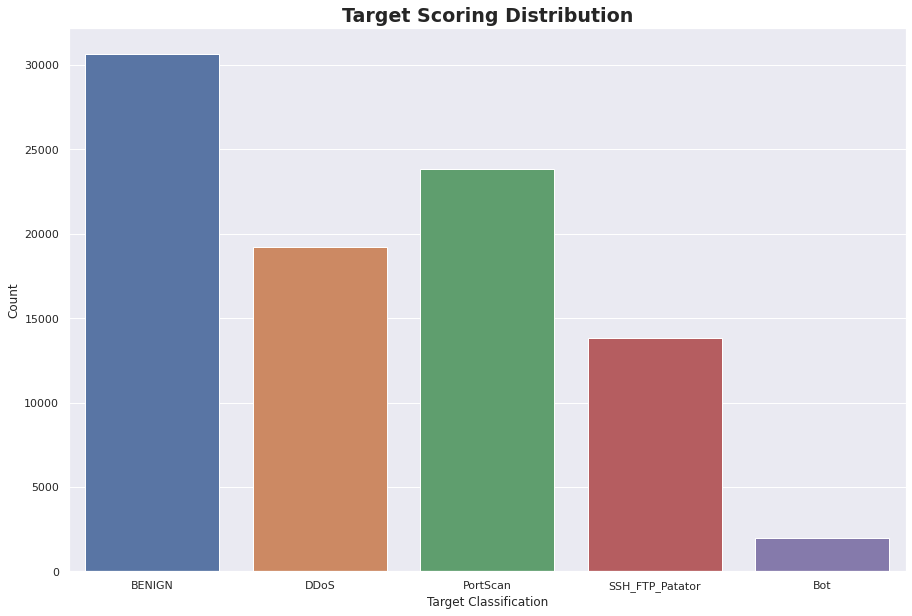

In [32]:
# check distribution of the target column

sns.set(rc = {'figure.figsize': (15, 10)})
sns.countplot(df_s['Label'])
plt.title('Target Scoring Distribution', fontsize=19, fontweight='bold')
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Target Classification', fontsize = 12)

In [33]:
# df_s = df_s.sample(n=None, frac=1, replace=False, weights=None, random_state=2023, axis=0)
# shuffle the DataFrame rows
df_s = df_s.sample(frac = 1).reset_index(drop=True)

In [34]:
# check head
df_s.tail()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
89471,80,94146637,8,6,56,11607,20,0,7.0,5.656854,5840,0,1934.500000,2538.919278,123.881217,0.148704,7.242049e+06,2.480000e+07,89600000,1,92900000,1.330000e+07,3.370000e+07,89600000,1,1239731,247946.2000,5.538925e+05,1238779,4,0,0,172,132,0.084974,0.063730,0,5840,777.933333,1804.898987,3.257660e+06,0,0,0,0,1,0,0,0,0,833.500000,7.0,1934.500000,172,8,56,6,11607,256,229,6,20,3289884.0,0.0,3289884,3289884,89600000.0,0.0,89600000,89600000,DDoS
89472,21,273,2,1,14,0,14,0,7.0,9.899495,0,0,0.000000,0.000000,51282.051280,10989.010990,1.365000e+02,8.697413e+01,198,75,273,2.730000e+02,0.000000e+00,273,273,0,0.0000,0.000000e+00,0,0,1,0,64,20,7326.007326,3663.003663,0,14,7.000000,8.082904,6.533333e+01,0,1,0,0,1,0,0,0,0,9.333333,7.0,0.000000,64,2,14,1,0,229,0,0,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH_FTP_Patator
89473,35500,59,1,1,0,6,0,0,0.0,0.000000,6,6,6.000000,0.000000,101694.915300,33898.305080,5.900000e+01,0.000000e+00,59,59,0,0.000000e+00,0.000000e+00,0,0,0,0.0000,0.000000e+00,0,0,0,0,40,20,16949.152540,16949.152540,0,6,2.000000,3.464102,1.200000e+01,0,0,0,1,0,0,0,0,1,3.000000,0.0,6.000000,40,1,0,1,6,29200,0,0,40,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
89474,80,8023831,4,0,24,0,6,6,6.0,0.000000,0,0,0.000000,0.000000,2.991090,0.498515,2.674610e+06,4.632559e+06,8023829,1,8023831,2.674610e+06,4.632559e+06,8023829,1,0,0.0000,0.000000e+00,0,0,0,0,80,0,0.498515,0.000000,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,0,0,0,0,7.500000,6.0,0.000000,80,4,24,0,0,256,-1,3,20,2.0,0.0,2,2,8023829.0,0.0,8023829,8023829,DDoS
89475,21,8320232,9,15,108,188,22,0,12.0,9.643651,34,0,12.533333,14.549750,35.575931,2.884535,3.617492e+05,9.483620e+05,3304584,3,5765769,7.207211e+05,1.352898e+06,3346286,237,8320121,594294.3571,1.171849e+06,3304584,3,0,0,296,488,1.081701,1.802834,0,34,11.840000,12.674384,1.606400e+02,0,0,0,1,0,0,0,0,1,12.333333,12.0,12.533333,296,9,108,15,188,29200,227,6,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH_FTP_Patator


In [35]:
# save the data for future usage
df_s.to_csv('./CICIDS2017.csv',index=0)

### Using Saved Dataset.
- In this case, the sampled and balanced dataset will be used.
- It will be loaded and used for model training.
- Baseline models will be created from it.

In [36]:
# CICIDS2017

# read saved dataset
df=  pd.read_csv("CICIDS2017.csv")

In [37]:
# check the sample of the new data set
df.shape

(89476, 71)

In [38]:
# check if there are null values in the saved dataset
df.isna().sum().any()

False

In [39]:
# get the Target Feattrues
Y = df.Label

In [40]:
# check distribution of target features
Y.value_counts(normalize=True)

BENIGN             0.342695
PortScan           0.266228
DDoS               0.214627
SSH_FTP_Patator    0.154589
Bot                0.021861
Name: Label, dtype: float64

In [41]:
# get training features
X = df.drop("Label", axis=1)

In [42]:
X.shape, Y.shape

((89476, 70), (89476,))

### split train set and test set

In [43]:
# encode the target values
labelencoder = LabelEncoder()

Y = labelencoder.fit_transform(Y.values)

In [44]:
# save the encoder
pd.to_pickle(labelencoder, "encoder.pkl")

In [45]:
# i want 15% for the testing and 85% for training so i will split into 7 splits
# i.e 100/15
skf = StratifiedKFold(n_splits=7, shuffle=False, random_state=None)
skf


StratifiedKFold(n_splits=7, random_state=None, shuffle=False)

In [46]:
# get X values
X = X.values
X.shape

(89476, 70)

- Now, splitting the data into train and test data, using the optimal splitting techniques of K-Fold and Stratified Splitting.

Code reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

In [47]:
# split into training and testing
# X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [48]:
for train_index, test_index in skf.split(X, Y):
    Xtrain, Xtest = X[train_index], X[test_index]
    Ytrain, Ytest = Y[train_index], Y[test_index]

    reshaped_y_train = np.asarray(Ytrain).reshape(-1, 1)
    reshaped_y_test = np.asarray(Ytest).reshape(-1, 1)
    
print('X_train length: ', len(Xtrain) ) # To check if splits worked
print('y_train length: ', len(Ytrain) )
print('X_test length: ', len(Xtest) )
print('y_test length: ', len(Ytest) )

X_train length:  76694
y_train length:  76694
X_test length:  12782
y_test length:  12782


## Machine learning model training

### Training four base learners: decision tree, random forest, extra trees, XGBoost

- At first I will create functions that will be used for analysis the models.
- The function will be based on metrics like f1score, accuracy, recall, precision, drawing ROC_AUC curves and also confussion matrix plots.
- Below is the implimentation of these functions.



In [49]:
def draw_roc_auc_curve(model, model_name, y_test, X_test):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    lw=2
    n_classes = len(labelencoder.classes_)
    sns.set(rc = {'figure.figsize': (15, 10)})
    Ytest_bin = label_binarize(y_test, classes=labelencoder.transform(labelencoder.classes_))
    base_preds_prob = model.predict_proba(X_test)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Ytest_bin[:, i], base_preds_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    #colors = cycle(['blue','purple', 'yellow', 'orange', 'brown', , 'red', 'green'])
    #get random colors for labelling
    colors = cycle(['#%06X' % np.random.randint(0, 0xFFFFFF) for _ in range(20)])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(labelencoder.inverse_transform([i])[0], roc_auc[i]))


    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate',fontsize=17, fontweight='bold')
    plt.ylabel('True Positive Rate',fontsize=17, fontweight='bold')
    plt.title(f'Receiver operating characteristic for {model_name}', fontsize=19, fontweight='bold')
    plt.legend(loc="lower right")
    plt.show()

In [50]:
def draw_confusion_matrix(actual, predicted, model_name):
    #get the normal metrics printed..
    print(f"{model_name} Metrics Analysis Results\n")
    print("\tAccuracy is  ", accuracy_score(actual, predicted))
    print("\tF1 Score is  ", f1_score(actual,predicted, average='weighted'))
    print("\tRecall Score is  ", recall_score(actual, predicted, average='weighted'))
    print("\tPrecision Score is  ", precision_score(actual, predicted, average='weighted'))
    print("\n\tOutputting Classification Report Matrix Plot\n")
    print(f"\t CLASSIFICATION REPORT FOR THE {model_name.upper()}")
    print(classification_report(actual, predicted, target_names=labelencoder.classes_))
    
    print("\n")
    cm = confusion_matrix( actual, predicted)
    sns.set(rc = {'figure.figsize': (10, 10)})
    sns.heatmap(cm, annot=True,  fmt='', linewidth=0.3,linecolor="red", xticklabels=labelencoder.classes_, yticklabels=labelencoder.classes_)
    plt.xlabel('True label', fontsize=16, fontweight='bold')
    plt.ylabel('Predicted label', fontsize=16, fontweight='bold')
    plt.title(f"Confussion Plot for {model_name}'s Perfomance", fontsize=19, fontweight='bold')
    plt.show()

### 1. Logistic Regression Model.
- THis is always the simplest model and baseline for most tasks.

In [51]:
# Logistic Regression Model
log_clf = DecisionTreeClassifier(random_state = 0)
# train the model
log_clf.fit(Xtrain,Ytrain) 


# get model score and predictions
log_score=log_clf.score(Xtest,Ytest)
log_preds=log_clf.predict(Xtest)
print('Accuracy of Logistic Regression Classifier: '+ str(log_score))
precision,recall,fscore,none= precision_recall_fscore_support(Ytest, log_preds, average='weighted') 
print('Precision of Logistic Regression Classifier: '+(str(precision)))
print('Recall of Logistic Regression Classifier: '+(str(recall)))
print('F1-score of Logistic Regression Classifier: '+(str(fscore)))

Accuracy of Logistic Regression Classifier: 0.9989047097480832
Precision of Logistic Regression Classifier: 0.9989024261350944
Recall of Logistic Regression Classifier: 0.9989047097480832
F1-score of Logistic Regression Classifier: 0.9989017492373268


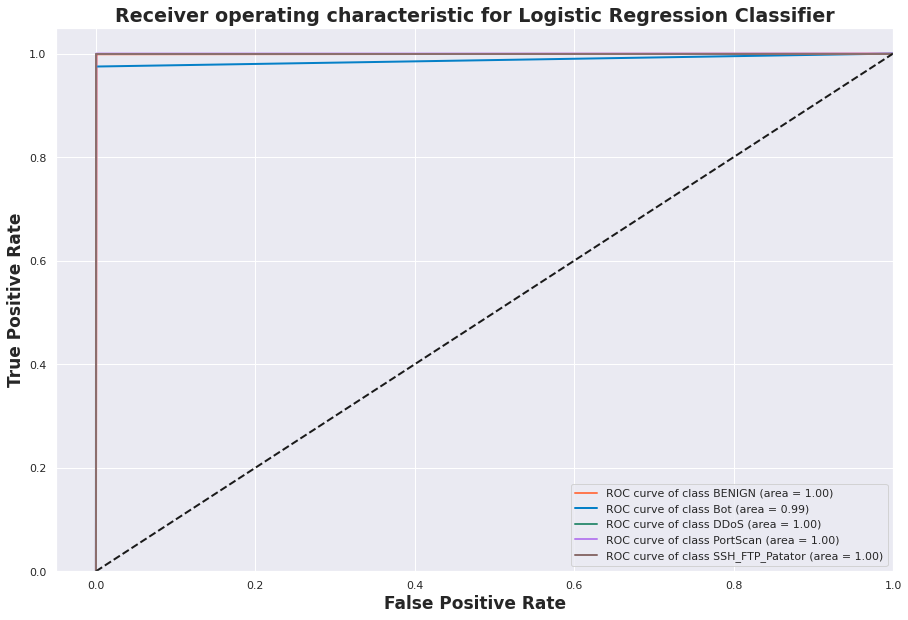

In [52]:
# 
# get the analysis of roc auc curve for logistic regression model
draw_roc_auc_curve(log_clf, "Logistic Regression Classifier", Ytest, Xtest)

Logistic Regression Classifier Metrics Analysis Results

	Accuracy is   0.9989047097480832
	F1 Score is   0.9989017492373268
	Recall Score is   0.9989047097480832
	Precision Score is   0.9989024261350944

	Outputting Classification Report Matrix Plot

	 CLASSIFICATION REPORT FOR THE LOGISTIC REGRESSION CLASSIFIER
                 precision    recall  f1-score   support

         BENIGN       1.00      1.00      1.00      4380
            Bot       0.99      0.97      0.98       280
           DDoS       1.00      1.00      1.00      2743
       PortScan       1.00      1.00      1.00      3403
SSH_FTP_Patator       1.00      1.00      1.00      1976

       accuracy                           1.00     12782
      macro avg       1.00      0.99      1.00     12782
   weighted avg       1.00      1.00      1.00     12782





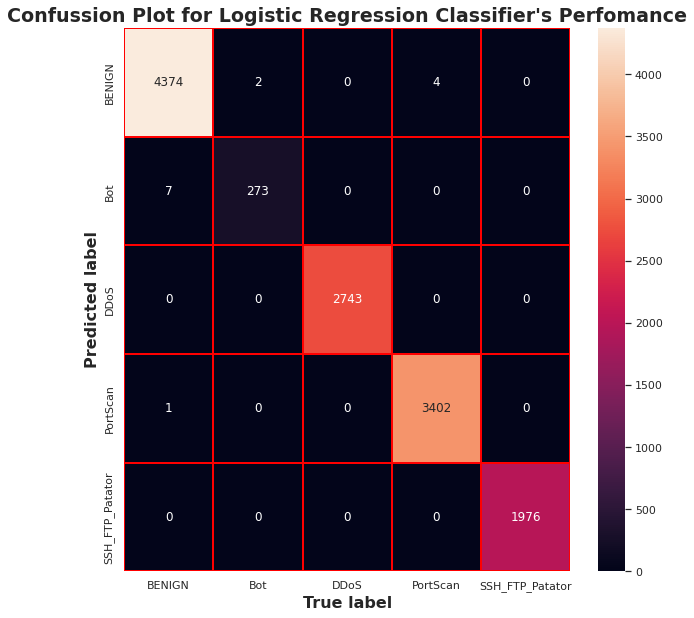

In [53]:
# confussion matric analysis for logistic regression model
draw_confusion_matrix(Ytest, log_clf.predict(Xtest), "Logistic Regression Classifier")

### 2. Decision Tree Classifier.

In [54]:
# Decision tree training and prediction
decision_model = DecisionTreeClassifier(random_state = 0)
# train the model
decision_model.fit(Xtrain,Ytrain) 


# get model score and predictions
dt_score=decision_model.score(Xtest,Ytest)
decision_pred=decision_model.predict(Xtest)
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(Ytest, decision_pred, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))

Accuracy of DT: 0.9989047097480832
Precision of DT: 0.9989024261350944
Recall of DT: 0.9989047097480832
F1-score of DT: 0.9989017492373268


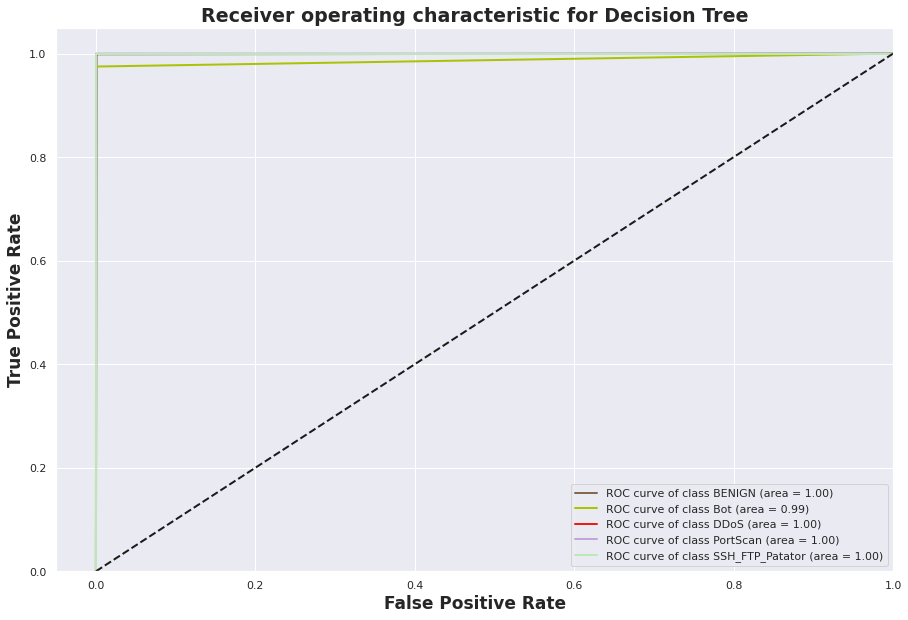

In [55]:
# get the analysis of roc auc curve
draw_roc_auc_curve(decision_model, "Decision Tree", Ytest, Xtest)

Decision Tree Metrics Analysis Results

	Accuracy is   0.9989047097480832
	F1 Score is   0.9989017492373268
	Recall Score is   0.9989047097480832
	Precision Score is   0.9989024261350944

	Outputting Classification Report Matrix Plot

	 CLASSIFICATION REPORT FOR THE DECISION TREE
                 precision    recall  f1-score   support

         BENIGN       1.00      1.00      1.00      4380
            Bot       0.99      0.97      0.98       280
           DDoS       1.00      1.00      1.00      2743
       PortScan       1.00      1.00      1.00      3403
SSH_FTP_Patator       1.00      1.00      1.00      1976

       accuracy                           1.00     12782
      macro avg       1.00      0.99      1.00     12782
   weighted avg       1.00      1.00      1.00     12782





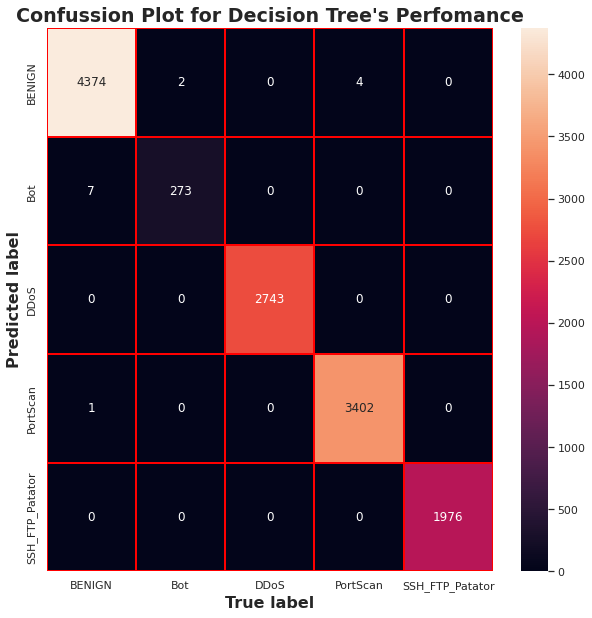

In [56]:
# confussion matric analysis
draw_confusion_matrix(Ytest, decision_model.predict(Xtest), "Decision Tree")

### 3. Train A RandomForest Model


In [57]:
# Random Forest training and prediction
rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(Xtrain,Ytrain) 
rf_score=rf_clf.score(Xtest,Ytest)
rf_clf_predict=rf_clf.predict(Xtest)
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(Ytest, rf_clf_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))




Accuracy of RF: 0.9993741198560475
Precision of RF: 0.9993734792732641
Recall of RF: 0.9993741198560475
F1-score of RF: 0.9993731181269735


In [58]:
print("Hey there")

Hey there


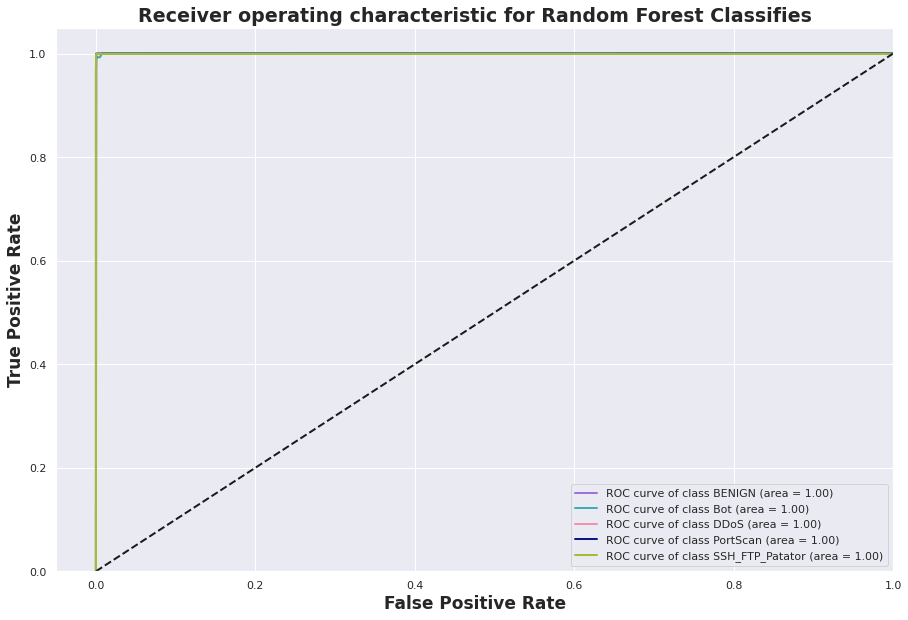

In [59]:
# get the analysis of roc auc curve fpr random forest
draw_roc_auc_curve(rf_clf, "Random Forest Classifies", Ytest, Xtest)



Random Forest Classifier Metrics Analysis Results

	Accuracy is   0.9993741198560475
	F1 Score is   0.9993731181269735
	Recall Score is   0.9993741198560475
	Precision Score is   0.9993734792732641

	Outputting Classification Report Matrix Plot

	 CLASSIFICATION REPORT FOR THE RANDOM FOREST CLASSIFIER
                 precision    recall  f1-score   support

         BENIGN       1.00      1.00      1.00      4380
            Bot       1.00      0.99      0.99       280
           DDoS       1.00      1.00      1.00      2743
       PortScan       1.00      1.00      1.00      3403
SSH_FTP_Patator       1.00      1.00      1.00      1976

       accuracy                           1.00     12782
      macro avg       1.00      1.00      1.00     12782
   weighted avg       1.00      1.00      1.00     12782





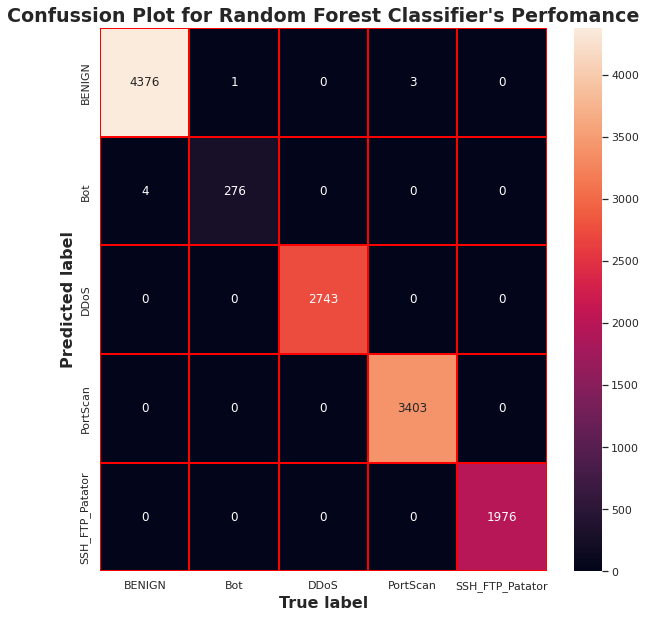

In [60]:
# confussion matric analysis for random forest
draw_confusion_matrix(Ytest, rf_clf.predict(Xtest), "Random Forest Classifier")

### 4. XGBOOST Model


In [61]:
# XGboost training and prediction
xgb_clf = XGBClassifier(n_estimators = 500)
xgb_clf.fit(Xtrain,Ytrain)
xgb_score=xgb_clf.score(Xtest,Ytest)
xgb_predict=xgb_clf.predict(Xtest)
print('Accuracy of XGBoost: '+ str(xgb_score))
precision,recall,fscore,none= precision_recall_fscore_support(Ytest, xgb_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))

Accuracy of XGBoost: 0.9994523548740416
Precision of XGBoost: 0.9994541367653242
Recall of XGBoost: 0.9994523548740416
F1-score of XGBoost: 0.9994528070309752


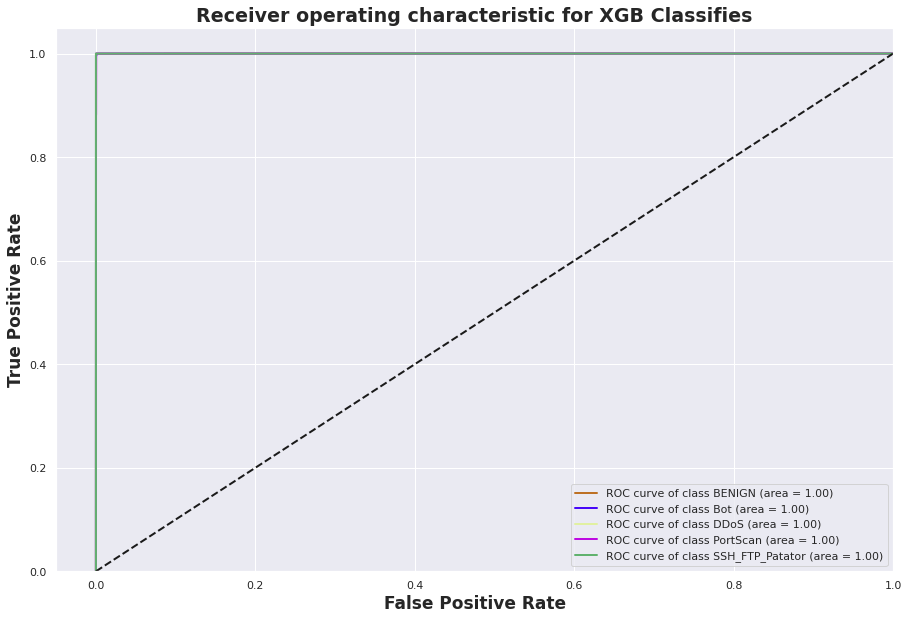

In [62]:
# get the analysis of roc auc curve for xgboost model
draw_roc_auc_curve(xgb_clf, "XGB Classifies", Ytest, Xtest)

XGB Classifier Metrics Analysis Results

	Accuracy is   0.9994523548740416
	F1 Score is   0.9994528070309752
	Recall Score is   0.9994523548740416
	Precision Score is   0.9994541367653242

	Outputting Classification Report Matrix Plot

	 CLASSIFICATION REPORT FOR THE XGB CLASSIFIER
                 precision    recall  f1-score   support

         BENIGN       1.00      1.00      1.00      4380
            Bot       0.99      1.00      0.99       280
           DDoS       1.00      1.00      1.00      2743
       PortScan       1.00      1.00      1.00      3403
SSH_FTP_Patator       1.00      1.00      1.00      1976

       accuracy                           1.00     12782
      macro avg       1.00      1.00      1.00     12782
   weighted avg       1.00      1.00      1.00     12782





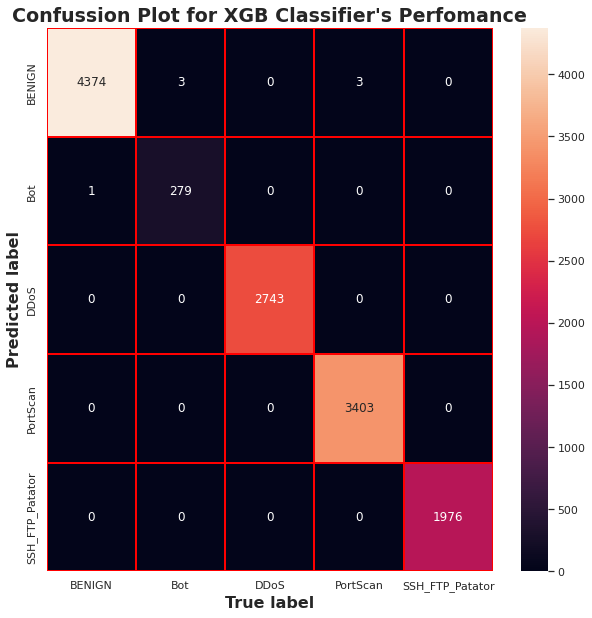

In [63]:
# confussion matric analysis for xgboost classifier
draw_confusion_matrix(Ytest, xgb_clf.predict(Xtest), "XGB Classifier")

In [64]:
# same random forest model

pd.to_pickle(rf_clf, "rf_clf.pkl")

### Feature Selection and Dimension Reduction for CICIDS2017 DATASET.
- In Machine Learning, feature selection and dimension reduction are important techniques used to improve the performance and efficiency of a model by reducing the number of input variables. The CICIDS2017 dataset provides a large number of features that can be used to train a machine learning model, however, not all of these features may be useful or necessary.


### Feature Selection
- Feature selection is the process of selecting a subset of the most relevant features from the available feature set, based on a certain criterion. This helps to remove irrelevant and redundant features, and can improve the accuracy, speed, and interpretability of the model.
- One common method of feature selection is to use a univariate statistical test, such as the chi-squared test or ANOVA, to identify the most relevant features. Another method is to use feature importances generated by tree-based algorithms, such as Random Forest or XGBoost, to select the most important features. In this project, I will use CHI_SQUARED TEST to select the top 40 features that best descript the output of a certain data packets. THose other Featiures will be ignored.


### Dimension Reduction
- Dimension reduction is the process of changing a high-dimensional feature space into a lower-dimensional representation, while preserving the relevant information i.e We try to reduce Curve of dimensionality by reducing the number of features while keeping as much as possible information about the daatset. 
- This can be achieved through techniques such as principal component analysis (PCA), linear discriminant analysis (LDA), and t-distributed stochastic neighbor embedding (t-SNE). 
- One common use of dimension reduction is to reduce the computational complexity of the model and to remove multicollinearity in the feature set. It can also be used for data visualization purposes, allowing patterns and relationships in the data to be more easily understood.
- FOr this project, PCA will be used as it it the eeasier method available. All Features from Feature selection Stage will be reduced into 20 Features i.e 40 features will be transafomed into 40 features

---
- By applying feature selection and dimension reduction techniques, we can improve the performance and efficiency of machine learning models (Beconmes more fast to train and Inference than running on  all features), while also making the data more interpretable.

---
### LETS DO FEATURE SELECTIONS TO GET TOP 40 Features.

In [65]:
# check the data available
X.shape, Y.shape

((89476, 70), (89476,))

In [66]:
# scaler the training features
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [67]:
df_s.shape

(89476, 71)

In [68]:
# Apply SelectKBest class to extract top 40 best features
bestfeatures = SelectKBest(score_func=f_classif, k=40)
# fit the algorithm for selection
bestfeatures_fit = bestfeatures.fit(scaler.transform(X), Y)

# get the scores for each featuire
bestfeatures_scores = pd.DataFrame(bestfeatures_fit.scores_)
bestfeatures_cols = pd.DataFrame(df.drop("Label", axis=1).columns)

# Concatenate two dataframes for better visualization
featureScores = pd.concat([bestfeatures_cols, bestfeatures_scores], axis=1)
# rename columsn
featureScores.columns = ['Specs', 'Score']

# get the tiop 10
print(featureScores.nlargest(10, 'Score'))

                     Specs         Score
12  Bwd Packet Length Mean  23377.776158
52    Avg Bwd Segment Size  23377.776158
38      Packet Length Mean  20575.791615
50     Average Packet Size  20561.120649
39       Packet Length Std  20407.351124
13   Bwd Packet Length Std  20072.057802
10   Bwd Packet Length Max  19959.085347
37       Max Packet Length  18237.738136
61    min_seg_size_forward  16050.970228
40  Packet Length Variance  14444.168514


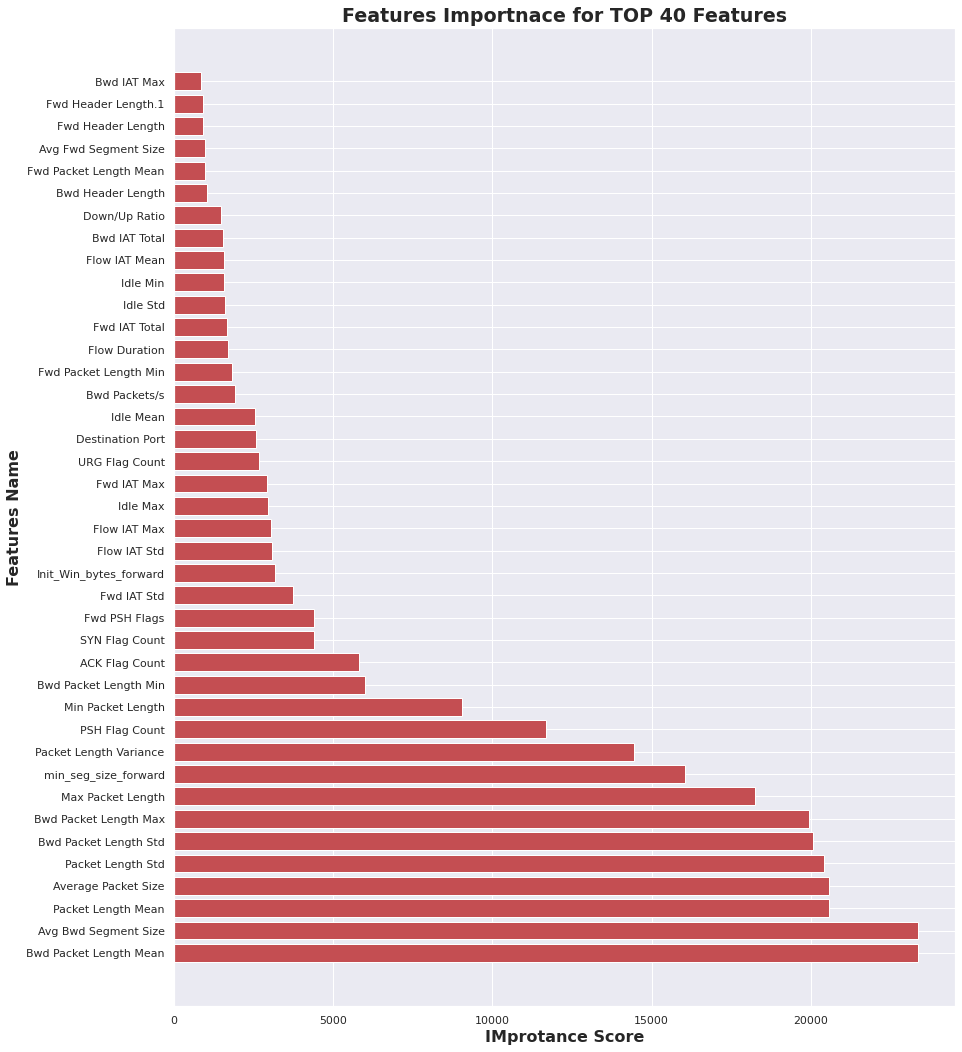

In [69]:
# Get the indices sorted by most important to least important
indices = np.argsort(bestfeatures_fit.scores_)[::-1]
# To get your top 40 feature names
features = []
for i in range(40):
    features.append(df.drop("Label", axis=1).columns[indices[i]])
# Now plot
plt.figure(figsize=(14,18))
plt.barh(features, bestfeatures_fit.scores_[indices[range(40)]], color='r', align='center')
plt.ylabel('Features Name', fontsize=16, fontweight='bold')
plt.xlabel('IMprotance Score', fontsize=16, fontweight='bold')
plt.title(f"Features Importnace for TOP 40 Features", fontsize=19, fontweight='bold')
plt.show()

### Results 
- From the above, we have seen the top 40 features that contributes greatly to the type of packed.
- One of them is AVG BWD segment size which s the topmost features in determining what is the target type.
- I will only use thse 40 features to the next process of dimensionality reduction.
- The value 40 is selected randomly.

In [70]:
TOP_N_FEATURES = features
print(TOP_N_FEATURES)

['Bwd Packet Length Mean', 'Avg Bwd Segment Size', 'Packet Length Mean', 'Average Packet Size', 'Packet Length Std', 'Bwd Packet Length Std', 'Bwd Packet Length Max', 'Max Packet Length', 'min_seg_size_forward', 'Packet Length Variance', 'PSH Flag Count', 'Min Packet Length', 'Bwd Packet Length Min', 'ACK Flag Count', 'SYN Flag Count', 'Fwd PSH Flags', 'Fwd IAT Std', 'Init_Win_bytes_forward', 'Flow IAT Std', 'Flow IAT Max', 'Idle Max', 'Fwd IAT Max', 'URG Flag Count', 'Destination Port', 'Idle Mean', 'Bwd Packets/s', 'Fwd Packet Length Min', 'Flow Duration', 'Fwd IAT Total', 'Idle Std', 'Idle Min', 'Flow IAT Mean', 'Bwd IAT Total', 'Down/Up Ratio', 'Bwd Header Length', 'Fwd Packet Length Mean', 'Avg Fwd Segment Size', 'Fwd Header Length', 'Fwd Header Length.1', 'Bwd IAT Max']


In [71]:
len(TOP_N_FEATURES)

40

### PCA FOR DIMESNIONS REDUCTION.
- Below is implimentation of PCA that takes the whole 40 features data selected above and reduce it into an array of 20 features (just a random selection).
- Here is the code

In [72]:
# define scaler to transform the dataset
scaler = StandardScaler()
scaler.fit(df[TOP_N_FEATURES])

pca_model = PCA(n_components=20)
principalComponents = pca_model.fit_transform(scaler.transform(df[TOP_N_FEATURES]))
principalDf = pd.DataFrame(data=principalComponents, columns=[f'PCA_{x}' for x in range(pca_model.n_components_)])

In [73]:
# check the selected Data frame
principalDf.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17,PCA_18,PCA_19
0,-1.561199,-0.136754,0.149967,0.252891,-0.876953,-0.017584,-0.066270,-0.043347,-0.670671,0.627482,0.088956,-0.375503,0.804157,-0.499438,-0.464016,0.113728,-0.295888,0.354727,-0.007967,-0.030972
1,-1.712553,1.361358,-2.138056,-3.776224,2.654966,0.025330,-2.763876,-0.295349,0.806062,0.165943,-0.053345,0.244204,0.147308,-0.378607,-0.377001,0.004872,-0.114261,0.029245,0.048219,0.036103
2,12.505827,4.571741,-2.542435,-0.929006,-1.586993,1.396585,1.335626,5.150638,1.133649,0.613578,-3.629255,-0.827866,0.799684,-1.464672,0.010625,-0.369148,0.418030,-0.069835,0.161884,0.360215
3,-0.514642,1.466967,-1.312680,-0.591605,0.317364,0.658886,0.605404,0.210551,-1.638283,0.057827,0.553909,0.359204,0.336492,0.395302,0.475656,-0.317605,0.107586,-0.407805,-0.389814,-0.101539
4,-1.712434,1.361346,-2.138079,-3.776181,2.655332,0.025573,-2.764217,-0.295252,0.805109,0.163531,-0.053620,0.243391,0.147492,-0.378867,-0.377328,0.004928,-0.114398,0.029326,0.048196,0.036068


### SPLIT THE NEW DATASET FOR TRAINING AND VALIDAITION.
- Same code as above will be used..

In [74]:
# we copied same code from above but these time we use training features that is transformed
for train_index, test_index in skf.split(principalDf, Y):
    Xtrain, Xtest = X[train_index], X[test_index]
    Ytrain, Ytest = Y[train_index], Y[test_index]

    reshaped_y_train = np.asarray(Ytrain).reshape(-1, 1)
    reshaped_y_test = np.asarray(Ytest).reshape(-1, 1)
    
print('X_train length: ', len(Xtrain) ) # To check if splits worked
print('y_train length: ', len(Ytrain) )
print('X_test length: ', len(Xtest) )
print('y_test length: ', len(Ytest) )

X_train length:  76694
y_train length:  76694
X_test length:  12782
y_test length:  12782


### Retraining Models to observe their Perfomacne.
- I willl use similar models as above Except that I will only Test Logistic Regresision and Random Forest and Later Build An ENsemble with the four models and check with the same metrics.

### 1b. Logistci regression with Feature selection and Dimensionality reduction

In [75]:
# Logistic Regression Model
log_clf2 = DecisionTreeClassifier(random_state = 0)
# train the model
log_clf2.fit(Xtrain,Ytrain) 


# get model score and predictions
log_score=log_clf2.score(Xtest,Ytest)
log_preds=log_clf2.predict(Xtest)
print('Accuracy of Logistic Regression Classifier with Feature selection: '+ str(log_score))
precision,recall,fscore,none= precision_recall_fscore_support(Ytest, log_preds, average='weighted') 
print('Precision of Logistic Regression Classifier  with Feature selection: '+(str(precision)))
print('Recall of Logistic Regression Classifier with Feature selection: '+(str(recall)))
print('F1-score of Logistic Regression Classifier with Feature selection: '+(str(fscore)))

Accuracy of Logistic Regression Classifier with Feature selection: 0.9989047097480832
Precision of Logistic Regression Classifier  with Feature selection: 0.9989024261350944
Recall of Logistic Regression Classifier with Feature selection: 0.9989047097480832
F1-score of Logistic Regression Classifier with Feature selection: 0.9989017492373268


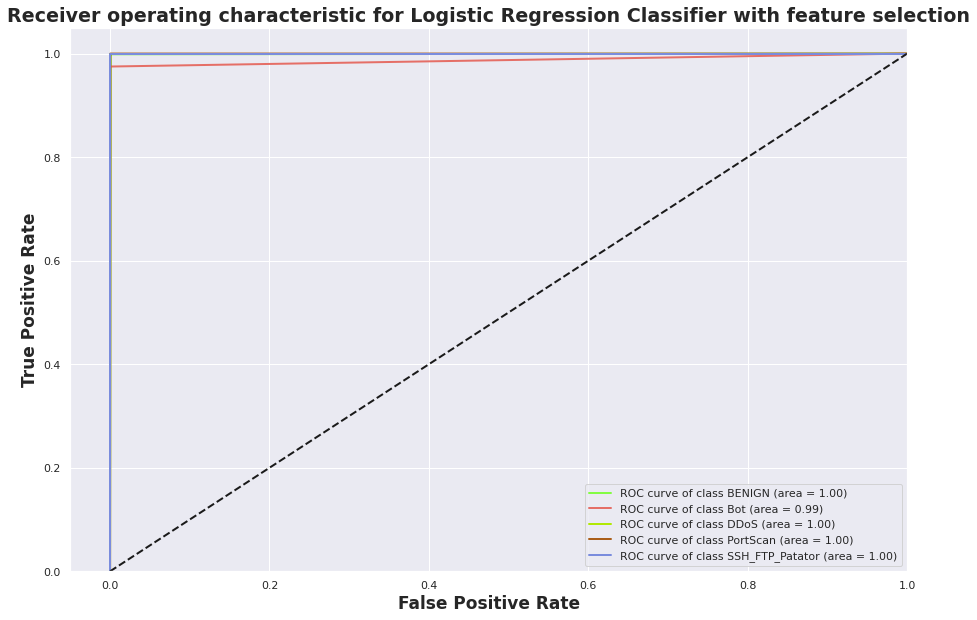

In [76]:
# Feature reduction resule
# get the analysis of roc auc curve for logistic regression model
draw_roc_auc_curve(log_clf2, "Logistic Regression Classifier with feature selection", Ytest, Xtest)

Logistic Regression Classifier with Feature selection Metrics Analysis Results

	Accuracy is   0.9989047097480832
	F1 Score is   0.9989017492373268
	Recall Score is   0.9989047097480832
	Precision Score is   0.9989024261350944

	Outputting Classification Report Matrix Plot

	 CLASSIFICATION REPORT FOR THE LOGISTIC REGRESSION CLASSIFIER WITH FEATURE SELECTION
                 precision    recall  f1-score   support

         BENIGN       1.00      1.00      1.00      4380
            Bot       0.99      0.97      0.98       280
           DDoS       1.00      1.00      1.00      2743
       PortScan       1.00      1.00      1.00      3403
SSH_FTP_Patator       1.00      1.00      1.00      1976

       accuracy                           1.00     12782
      macro avg       1.00      0.99      1.00     12782
   weighted avg       1.00      1.00      1.00     12782





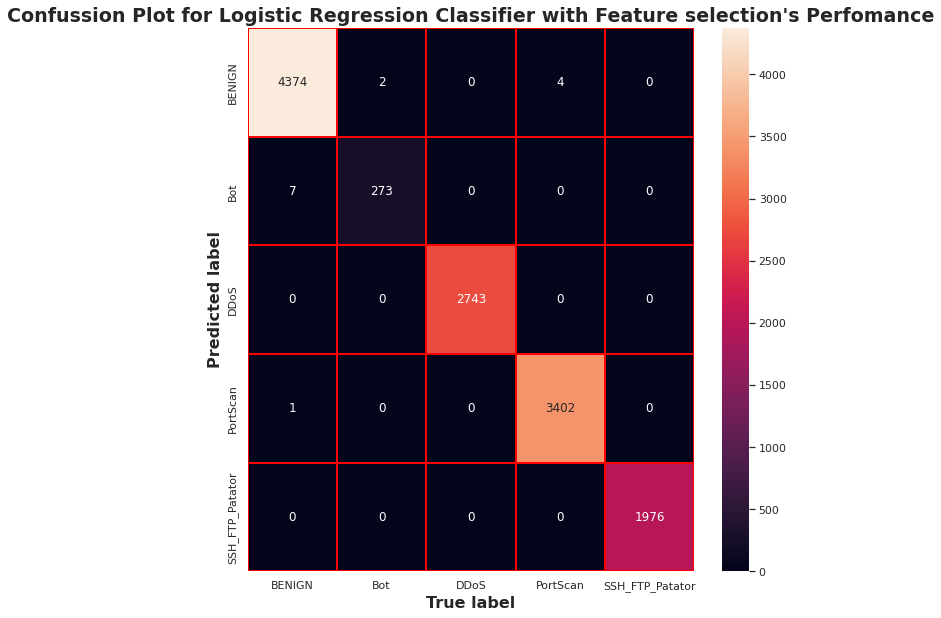

In [77]:
# confussion matric analysis for logistic regression model
draw_confusion_matrix(Ytest, log_clf2.predict(Xtest), "Logistic Regression Classifier with Feature selection")

### 2b Random Forest with PCA and Feature selection

In [78]:
# Random Forest training and prediction
rf_clf2 = RandomForestClassifier(random_state = 0)
rf_clf2.fit(Xtrain,Ytrain) 
rf_score=rf_clf2.score(Xtest,Ytest)
rf_clf_predict=rf_clf2.predict(Xtest)
print('Accuracy of RF With Feature selection: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(Ytest, rf_clf_predict, average='weighted') 
print('Precision of RF With Feature selection: '+(str(precision)))
print('Recall of RF With Feature selection: '+(str(recall)))
print('F1-score of RF With Feature selection: '+(str(fscore)))


Accuracy of RF With Feature selection: 0.9993741198560475
Precision of RF With Feature selection: 0.9993734792732641
Recall of RF With Feature selection: 0.9993741198560475
F1-score of RF With Feature selection: 0.9993731181269735


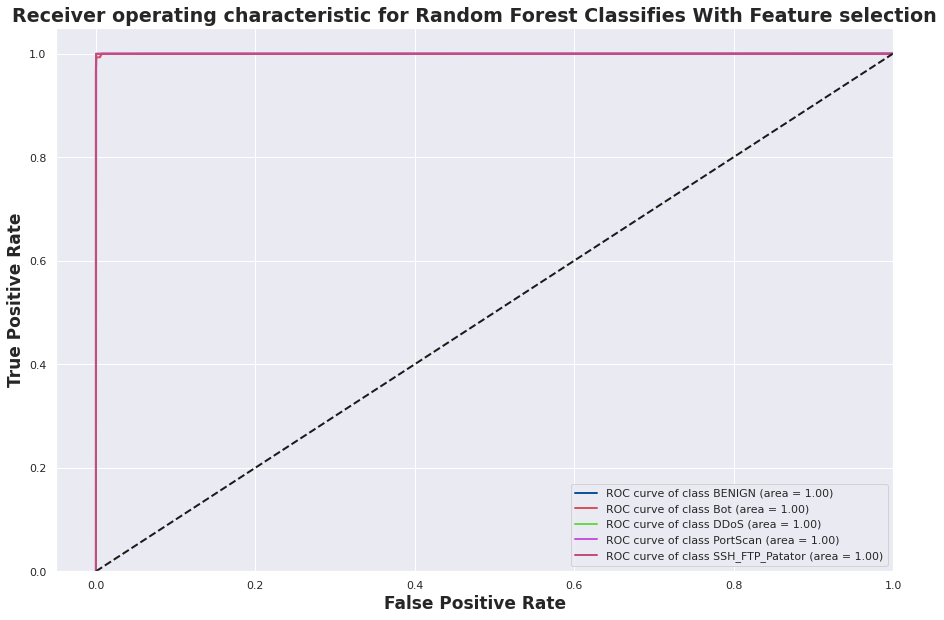

In [79]:

# RF WITH FEATURE SELECTION
# get the analysis of roc auc curve fpr random forest
draw_roc_auc_curve(rf_clf, "Random Forest Classifies With Feature selection", Ytest, Xtest)

Random Forest Classifier With Feature selection Metrics Analysis Results

	Accuracy is   0.9993741198560475
	F1 Score is   0.9993731181269735
	Recall Score is   0.9993741198560475
	Precision Score is   0.9993734792732641

	Outputting Classification Report Matrix Plot

	 CLASSIFICATION REPORT FOR THE RANDOM FOREST CLASSIFIER WITH FEATURE SELECTION
                 precision    recall  f1-score   support

         BENIGN       1.00      1.00      1.00      4380
            Bot       1.00      0.99      0.99       280
           DDoS       1.00      1.00      1.00      2743
       PortScan       1.00      1.00      1.00      3403
SSH_FTP_Patator       1.00      1.00      1.00      1976

       accuracy                           1.00     12782
      macro avg       1.00      1.00      1.00     12782
   weighted avg       1.00      1.00      1.00     12782





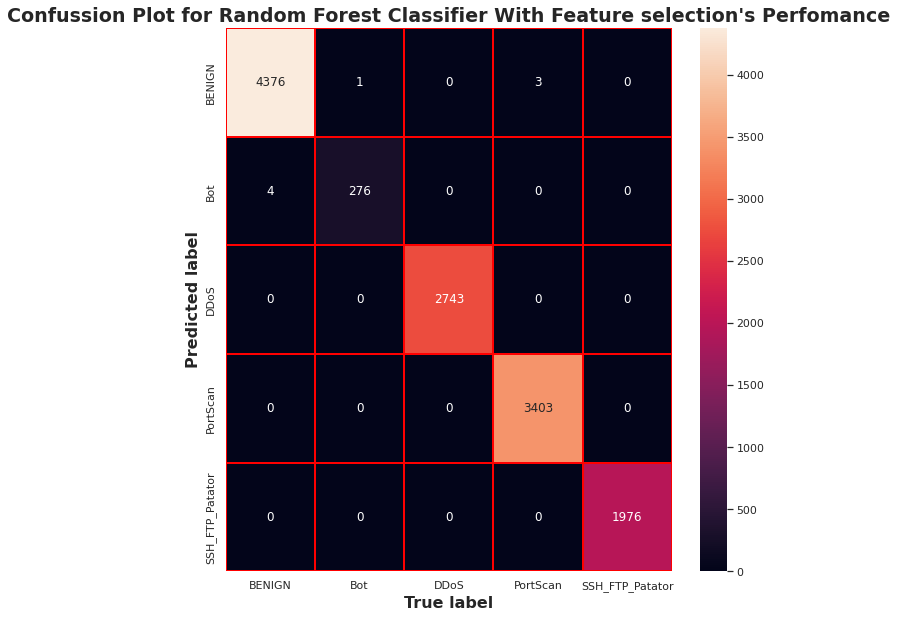

In [80]:
draw_confusion_matrix(Ytest, rf_clf.predict(Xtest), "Random Forest Classifier With Feature selection")

## FINALLY.
### ENSEMBLING THROUGH STACKING.
---


- A stacking model is an ensemble learning technique where multiple models are combined to make a final prediction. In this case, I will stack random forest, logistic regression, XGBoost, and decision trees to build a more powerful model.


- The four base models (random forest, logistic regression, XGBoost, and decision trees) will be trained on the training data, and their predictions are generated for both the training and testing data. These predictions are then concatenated and used as input for the meta model (logistic regression in this case), which is also trained on the training data. Finally, the accuracy of the stacking model is calculated using the testing data. Below is the implimentation

In [81]:
# Initialize the base models
rf = RandomForestClassifier(n_estimators=100, random_state=0)
lr = LogisticRegression(random_state=0)
xgb = XGBClassifier(random_state=0)
dt = DecisionTreeClassifier(random_state=0)

# Fit the base models on the training data
rf.fit(Xtrain, Ytrain)
lr.fit(Xtrain, Ytrain)
xgb.fit(Xtrain, Ytrain)
dt.fit(Xtrain, Ytrain)
print("Done Predicting Base Models")

Done Predicting Base Models


In [86]:
# get probs
rf.predict_proba(Xtrain)

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [87]:
# Generate predictions for the training data using the base models
train_preds_rf = rf.predict_proba(Xtrain)[:]
train_preds_lr = lr.predict_proba(Xtrain)[:]
train_preds_xgb = xgb.predict_proba(Xtrain)[:]
train_preds_dt = dt.predict_proba(Xtrain)[:]

# Concatenate the predictions from the base models
train_preds = np.column_stack((train_preds_rf, train_preds_lr, train_preds_xgb, train_preds_dt))

# Generate predictions for the testing data using the base models
test_preds_rf = rf.predict_proba(Xtest)[:]
test_preds_lr = lr.predict_proba(Xtest)[:]
test_preds_xgb = xgb.predict_proba(Xtest)[:]
test_preds_dt = dt.predict_proba(Xtest)[:]

# Concatenate the predictions from the base models
test_preds = np.column_stack((test_preds_rf, test_preds_lr, test_preds_xgb, test_preds_dt))

print("Done getting concantenated predicitions from base models")

Done getting concantenated predicitions from base models


In [89]:
test_preds.shape, train_preds.shape

((12782, 20), (76694, 20))

In [90]:
test_preds

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [91]:

# BUILDING A STACKER MODELS AS RandomForestClassifier
# Initialize the meta model
meta_model = RandomForestClassifier(random_state=0, n_estimators=1000)

# Fit the meta model on the predictions from the base models
meta_model.fit(train_preds, Ytrain)

# Generate predictions for the testing data using the meta model
final_preds = meta_model.predict(test_preds)

In [95]:
# EVALUATATE THE META MODEL TO SEE ITS PERFOMANXE

# Calculate the accuracy of the

accuracy = accuracy_score(Ytest, final_preds)
print("Accuracy of Stacking Model: {:.2f}%".format(accuracy*100))

Accuracy of Stacking Model: 99.96%


### EVALUATIONG STACKED MODELS

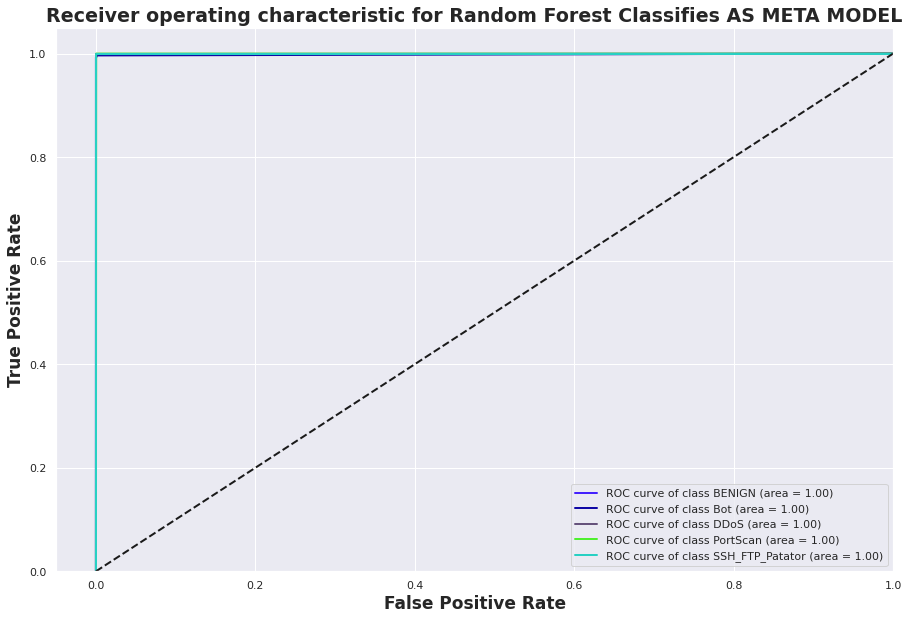

In [93]:

# STACKED MODEL EVALUATION WITH FEATURE SELECTION
# FPR analysis for meta model
draw_roc_auc_curve(meta_model, "Random Forest Classifies AS META MODEL", Ytest, test_preds)

Random Forest Classifies AS META MODEL Metrics Analysis Results

	Accuracy is   0.9996088249100298
	F1 Score is   0.9996085738726254
	Recall Score is   0.9996088249100298
	Precision Score is   0.9996089959059999

	Outputting Classification Report Matrix Plot

	 CLASSIFICATION REPORT FOR THE RANDOM FOREST CLASSIFIES AS META MODEL
                 precision    recall  f1-score   support

         BENIGN       1.00      1.00      1.00      4380
            Bot       1.00      0.99      1.00       280
           DDoS       1.00      1.00      1.00      2743
       PortScan       1.00      1.00      1.00      3403
SSH_FTP_Patator       1.00      1.00      1.00      1976

       accuracy                           1.00     12782
      macro avg       1.00      1.00      1.00     12782
   weighted avg       1.00      1.00      1.00     12782





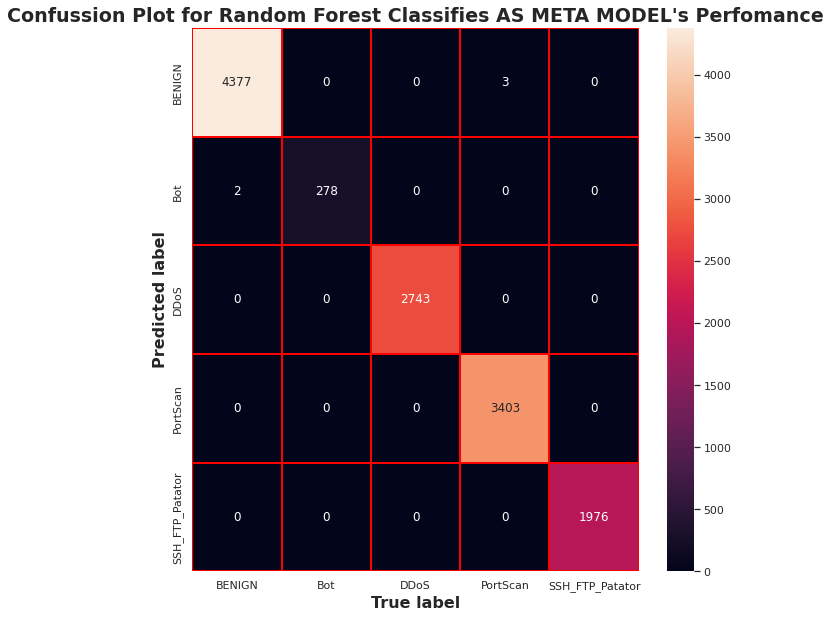

In [94]:
# plot confunction matrix for meta model
draw_confusion_matrix(Ytest, final_preds, "Random Forest Classifies AS META MODEL")

### CONCLUSION.
---

- The results of a stacking model using Random Forest as the meta model show that the individual models (Random Forest, Logistic Regression, XGBoost, Decision tree clasisifer) were outperformed better by the stacking model. The accuracy, F1 score, recall score, and precision score of the individual models were abit lower compared to the stacking model. The accuracy of the Random Forest model was 0.999, the Logistic Regression model was 0.998, the Decision treee model was 0.999,and the XGBoost model was 0.999. However, the stacking model had an accuracy of only 1.000 Where only 3 classes were not predicted accurately.

- Based on the results of the individual models and the stacking model, it is clear that the Random Forest, Logistic Regression, and XGBoost and Metal Model  models performed better. To determine which model to use, it would be necessary to consider additional factors such as the business problem and the specific requirements for the model.
- Since the goal was to achieve the best model, it seems that using the Metal Model of Random Forest or XGBoost model would be the best choice. 
- Normally it is important to thoroughly evaluate and compare the performance of multiple models to make an informed decision as we have done above with different situations in order ot come into conclusion on the best selection. Also we could include trying different meta models, feature selection techniques, and algorithms to ensure that the best possible model is chosen for the given problem but since we hace achieved a good score we let it go.
- In conclusion, the meta model in this case did perform as well as the individual models with a slight improvement. More perfomance can be achieved though in various ways, i.e such as the choice of meta model or the way in which the predictions from the base models were combined. It is important to carefully consider the model selection and implementation when using stacking to improve the performance.

---
DONE
---
